In [ ]:
""" Import of modules """
import numpy.random as np
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
from tqdm import tqdm_notebook as tqdm

sns.set()
nzeros = numpy.zeros
RAND = np.random_sample
nexp = numpy.exp
nrange = numpy.arange

""" Initialization """
Npop = 1000 #Population size
parr = nexp(nrange(-24, -14)) #Mutation rate
narr = nexp(nrange(14, 25)) #Cell number
# garr = numpy.array([0.03125, 0.0625, 0.125, 0.25, 0.5])
# rep = 100

ndiv = 365 #Number of cell divisions per year
age = 100 #Lifespan
time = ndiv*age #Duration of the simulation


threshold = 5 #Mutation threshold for cancer
n = narr[8] #Carrying capacity
p = parr[8] #Mutation rate

g = numpy.linspace(0.007, 0.007*(threshold+1), num=threshold+1) #Growth rate progression
d = g[0]/5 #Constant death rate
delta = 0.001*g[0]

wts=numpy.array([0.013818048555027355, 0.0553159434123515, 0.07253241028642805, 0.07303103455912367, 0.07216711636515384, 0.06647847243710951, 0.06452984736662379, 0.07104508339877749, 0.08076197744193335, 0.08185169462960405, 0.07211714069611326, 0.06271758577923968, 0.048454493422914295, 0.038794489715138394, 0.034263609991378986, 0.03177168658747205, 0.026997999757072733, 0.017842803104216928, 0.01550856249432107]) #Weights from the US 2000 standard population
n_class = len(wts)

cancer_count = nzeros(age) #Age-wise incidence of cancer
num_surv = nzeros(age) #Number of survivors in each age/generation
cancer_fract = nzeros(age) #Normalized incidence of cancer
cumul_count = nzeros(age) #Cumulative count of cancer
crude_rate = nzeros(age) #Calculated age-wise incidence per 100000

for j in tqdm(range(Npop), desc='Npop', leave=False):
    t=0 #Index to track time
    n_mut = nzeros(time, dtype=int) #Number of mutations
    m = nzeros((threshold+1)*time).reshape((threshold+1), time)
    m[0, 0] = 1

    p_mut = nzeros(time)

    for t in range(1, time):

        n_mut[t] = n_mut[t-1]
        m[:, t] = m[:, t-1]
        p_mut[t] = 1-(1-p)**m[n_mut[t], t]

        if p_mut[t] > RAND(): #New mutant population
            n_mut[t] += 1
            m[n_mut[t], t] = 1.0
            p_mut[t] = 1-((1-p)**m[n_mut[t], t])
            m[n_mut[t]-1, t] -= 1.0

        elif n_mut[t] < threshold: #Growth of existing mutant or normal population, as the case may be
            m[:, t] += ((m[:, t]*g*(n-m[:, t].sum())/n) - m[:, t]*d)
            p_mut[t] = 1-(1-p)**m[n_mut[t], t]
        
#         g[:n_mut[t]] -= delta

        if n_mut[t] == threshold:
            cancer_count[int(t/ndiv)] += 1
            break

""" Calculations """
cumul_count = cancer_count.cumsum()

num_surv = numpy.array([Npop]*age, dtype=float)
num_surv[1:] -= cumul_count[:-1]

index = num_surv>0
cancer_fract[index] = cancer_count[index]/(cancer_count[index]+num_surv[index])
crude_rate = cancer_fract*100000

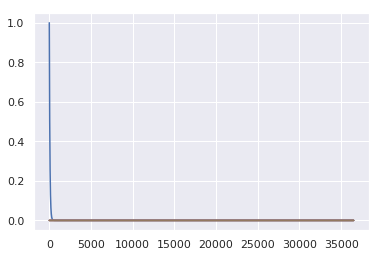

In [15]:
plt.plot(m.T)

## Mutational meltdown
- Applying Muller's ratchet to this does not seem very straightforward; for slightly smaller values of initial g, growth 